# Random Forest

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. __It is based on the concept of ensemble(Bagging) learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.__

As the name suggests, __"Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset."__ Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

__The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.__

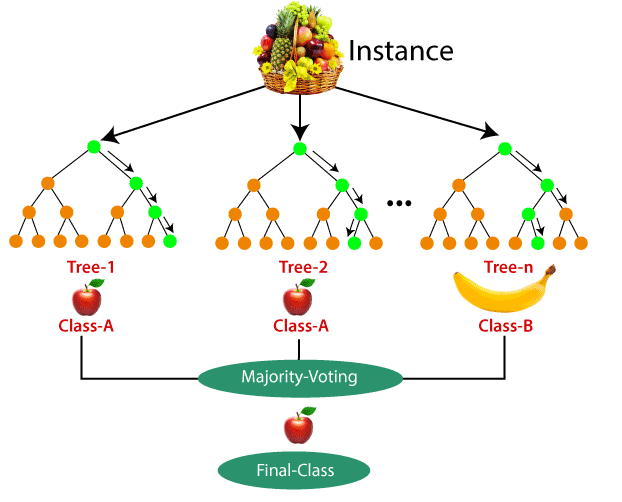

## PS: To determine important features affecting the income

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [74]:
data=pd.read_csv("income_evaluation.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [75]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [76]:
data.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [77]:
data.shape

(32561, 15)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [79]:
pd.set_option('display.max_rows', 200)
for i in data.columns:
    print(data[i].value_counts())
    print("---------------------------------------------------------------")

36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
51    595
49    577
18    550
48    543
52    478
53    464
55    419
54    415
17    395
56    366
58    366
57    358
59    355
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
79     22
80     22
81     20
82     12
84     10
83      6
88      3
85      3
86      1
87      1
Name: age, dtype: int64
---------------------------------------------------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov        

In [80]:
data[' workclass']=data[' workclass'].replace(' ?',data[' workclass'].mode()[0])
data[' occupation']=data[' occupation'].replace(' ?',data[' occupation'].mode()[0])
data[' native-country']=data[' native-country'].replace(' ?',data[' native-country'].mode()[0])
# data[' income']=data[' income'].replace(' <=50K',50000)
# data[' income']=data[' income'].replace(' >50K',51000)


In [81]:
pd.set_option('display.max_rows', 200)
for i in data.columns:
    print(data[i].value_counts())
    print("---------------------------------------------------------------")

36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
51    595
49    577
18    550
48    543
52    478
53    464
55    419
54    415
17    395
56    366
58    366
57    358
59    355
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
79     22
80     22
81     20
82     12
84     10
83      6
88      3
85      3
86      1
87      1
Name: age, dtype: int64
---------------------------------------------------------------
 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay        

### Visualization 

<AxesSubplot:xlabel=' income', ylabel='count'>

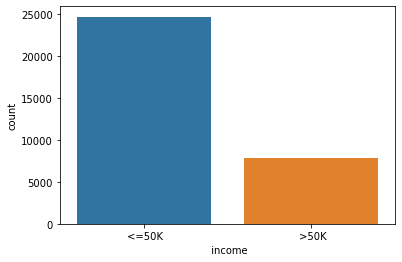

In [82]:
sns.countplot(x=' income',data=data)

In [83]:
data[' income'].value_counts()

 <=50K    24720
 >50K      7841
Name:  income, dtype: int64

<AxesSubplot:xlabel=' income', ylabel='count'>

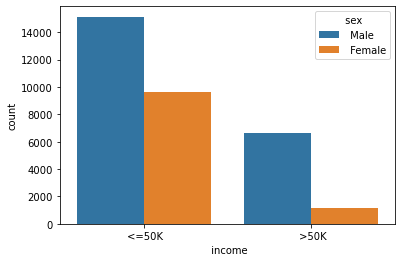

In [84]:
sns.countplot(x=' income',hue=' sex',data=data)

In [85]:
data.groupby([' income',' sex'])[' sex'].count()

 income   sex   
 <=50K    Female     9592
          Male      15128
 >50K     Female     1179
          Male       6662
Name:  sex, dtype: int64

<AxesSubplot:xlabel=' income', ylabel='count'>

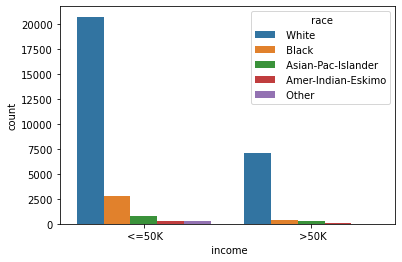

In [86]:
sns.countplot(x=' income',hue=' race',data=data)

In [87]:
data.groupby([' income',' race'])[' race'].count()

 income   race              
 <=50K    Amer-Indian-Eskimo      275
          Asian-Pac-Islander      763
          Black                  2737
          Other                   246
          White                 20699
 >50K     Amer-Indian-Eskimo       36
          Asian-Pac-Islander      276
          Black                   387
          Other                    25
          White                  7117
Name:  race, dtype: int64

<AxesSubplot:xlabel=' income', ylabel='count'>

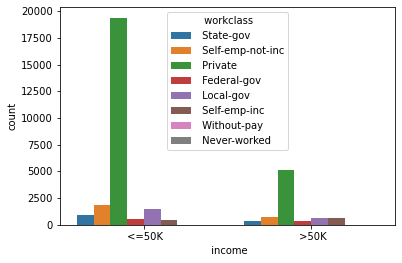

In [88]:
sns.countplot(x=' income',hue=' workclass',data=data)

In [89]:
data.groupby([' income',' workclass'])[' workclass'].count()

 income   workclass       
 <=50K    Federal-gov           589
          Local-gov            1476
          Never-worked            7
          Private             19378
          Self-emp-inc          494
          Self-emp-not-inc     1817
          State-gov             945
          Without-pay            14
 >50K     Federal-gov           371
          Local-gov             617
          Private              5154
          Self-emp-inc          622
          Self-emp-not-inc      724
          State-gov             353
Name:  workclass, dtype: int64

<AxesSubplot:xlabel=' income, workclass'>

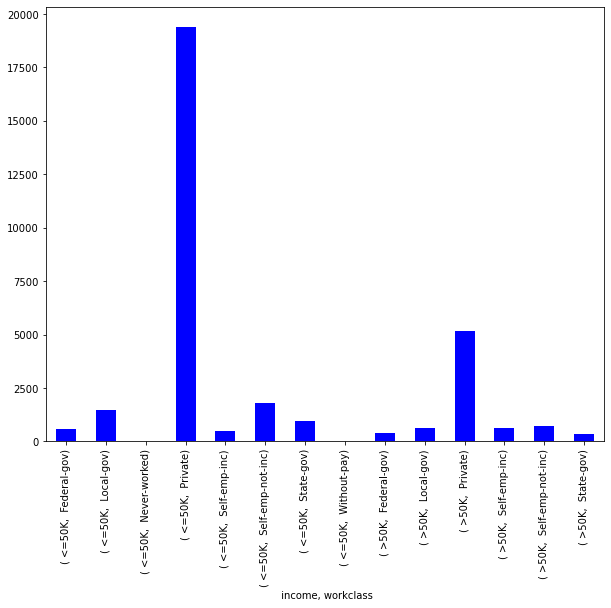

In [90]:
plt.figure(figsize=(10,8))
data.groupby([' income',' workclass'])[' workclass'].count().plot(kind='bar',color='blue')

## Model building

In [91]:
X = data.drop([' income'], axis=1)

y = data[' income']

In [92]:
X.shape,y.shape

((32561, 14), (32561,))

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [94]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((22792, 14), (9769, 14), (22792,), (9769,))

In [95]:
categorical=[col for col in X_train if X_train[col].dtypes=='O']
categorical

[' workclass',
 ' education',
 ' marital-status',
 ' occupation',
 ' relationship',
 ' race',
 ' sex',
 ' native-country']

In [96]:
numerical=[col for col in X_train if X_train[col].dtypes!='O']
numerical

['age',
 ' fnlwgt',
 ' education-num',
 ' capital-gain',
 ' capital-loss',
 ' hours-per-week']

In [97]:
X_train[categorical].isnull().mean()

 workclass         0.0
 education         0.0
 marital-status    0.0
 occupation        0.0
 relationship      0.0
 race              0.0
 sex               0.0
 native-country    0.0
dtype: float64

### One-hot encoding

In [98]:
# # !pip install category_encoders
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=[' workclass',' education',' marital-status',' occupation',' relationship',' race',' sex',' native-country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [99]:
# check missing values in X_train

X_train.isnull().sum()
X_train.head()
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,0,0


In [100]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=10,random_state=1)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy:{0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy:0.8470


In [111]:
rfc_100 = RandomForestClassifier(n_estimators=100, max_depth=7,random_state=2)

# fit the model to the training set

rfc_100.fit(X_train, y_train)

# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))
print(rfc_100.score(X_train, y_train))
print(rfc_100.score(X_test, y_test))

Model accuracy score with 100 decision-trees : 0.8500
0.8542032292032292
0.8500358276179752


In [102]:
# from sklearn.preprocessing import RobustScaler

# scalar=RobustScaler()
# X_train=scalar.fit_transform(X_train)
# X_test=scalar.transform(X_test)

# rfc=RandomForestClassifier()
# rfc.fit(X_train,y_train)
# y_pred=rfc.predict(X_test)

# print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

### Important Features

In [103]:
clf=RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(X_train,y_train)


RandomForestClassifier(random_state=0)

In [104]:
feature_scores=pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_scores

 fnlwgt               1.597213e-01
age                   1.492971e-01
 capital-gain         9.350270e-02
 hours-per-week       8.674922e-02
 education-num        6.355156e-02
 marital-status_1     5.594732e-02
 relationship_1       4.942941e-02
 capital-loss         2.993277e-02
 marital-status_3     2.345037e-02
 occupation_9         1.966242e-02
 education_4          1.262384e-02
 workclass_1          1.136462e-02
 relationship_6       1.111199e-02
 relationship_3       1.086059e-02
 sex_2                1.082429e-02
 occupation_4         9.797949e-03
 sex_1                9.384651e-03
 education_7          9.344599e-03
 education_1          8.913002e-03
 workclass_3          8.474471e-03
 relationship_4       8.369902e-03
 occupation_3         7.504678e-03
 occupation_1         7.290558e-03
 occupation_7         6.969896e-03
 race_1               6.642851e-03
 marital-status_2     5.949250e-03
 education_2          5.826936e-03
 occupation_2         5.777344e-03
 workclass_4        

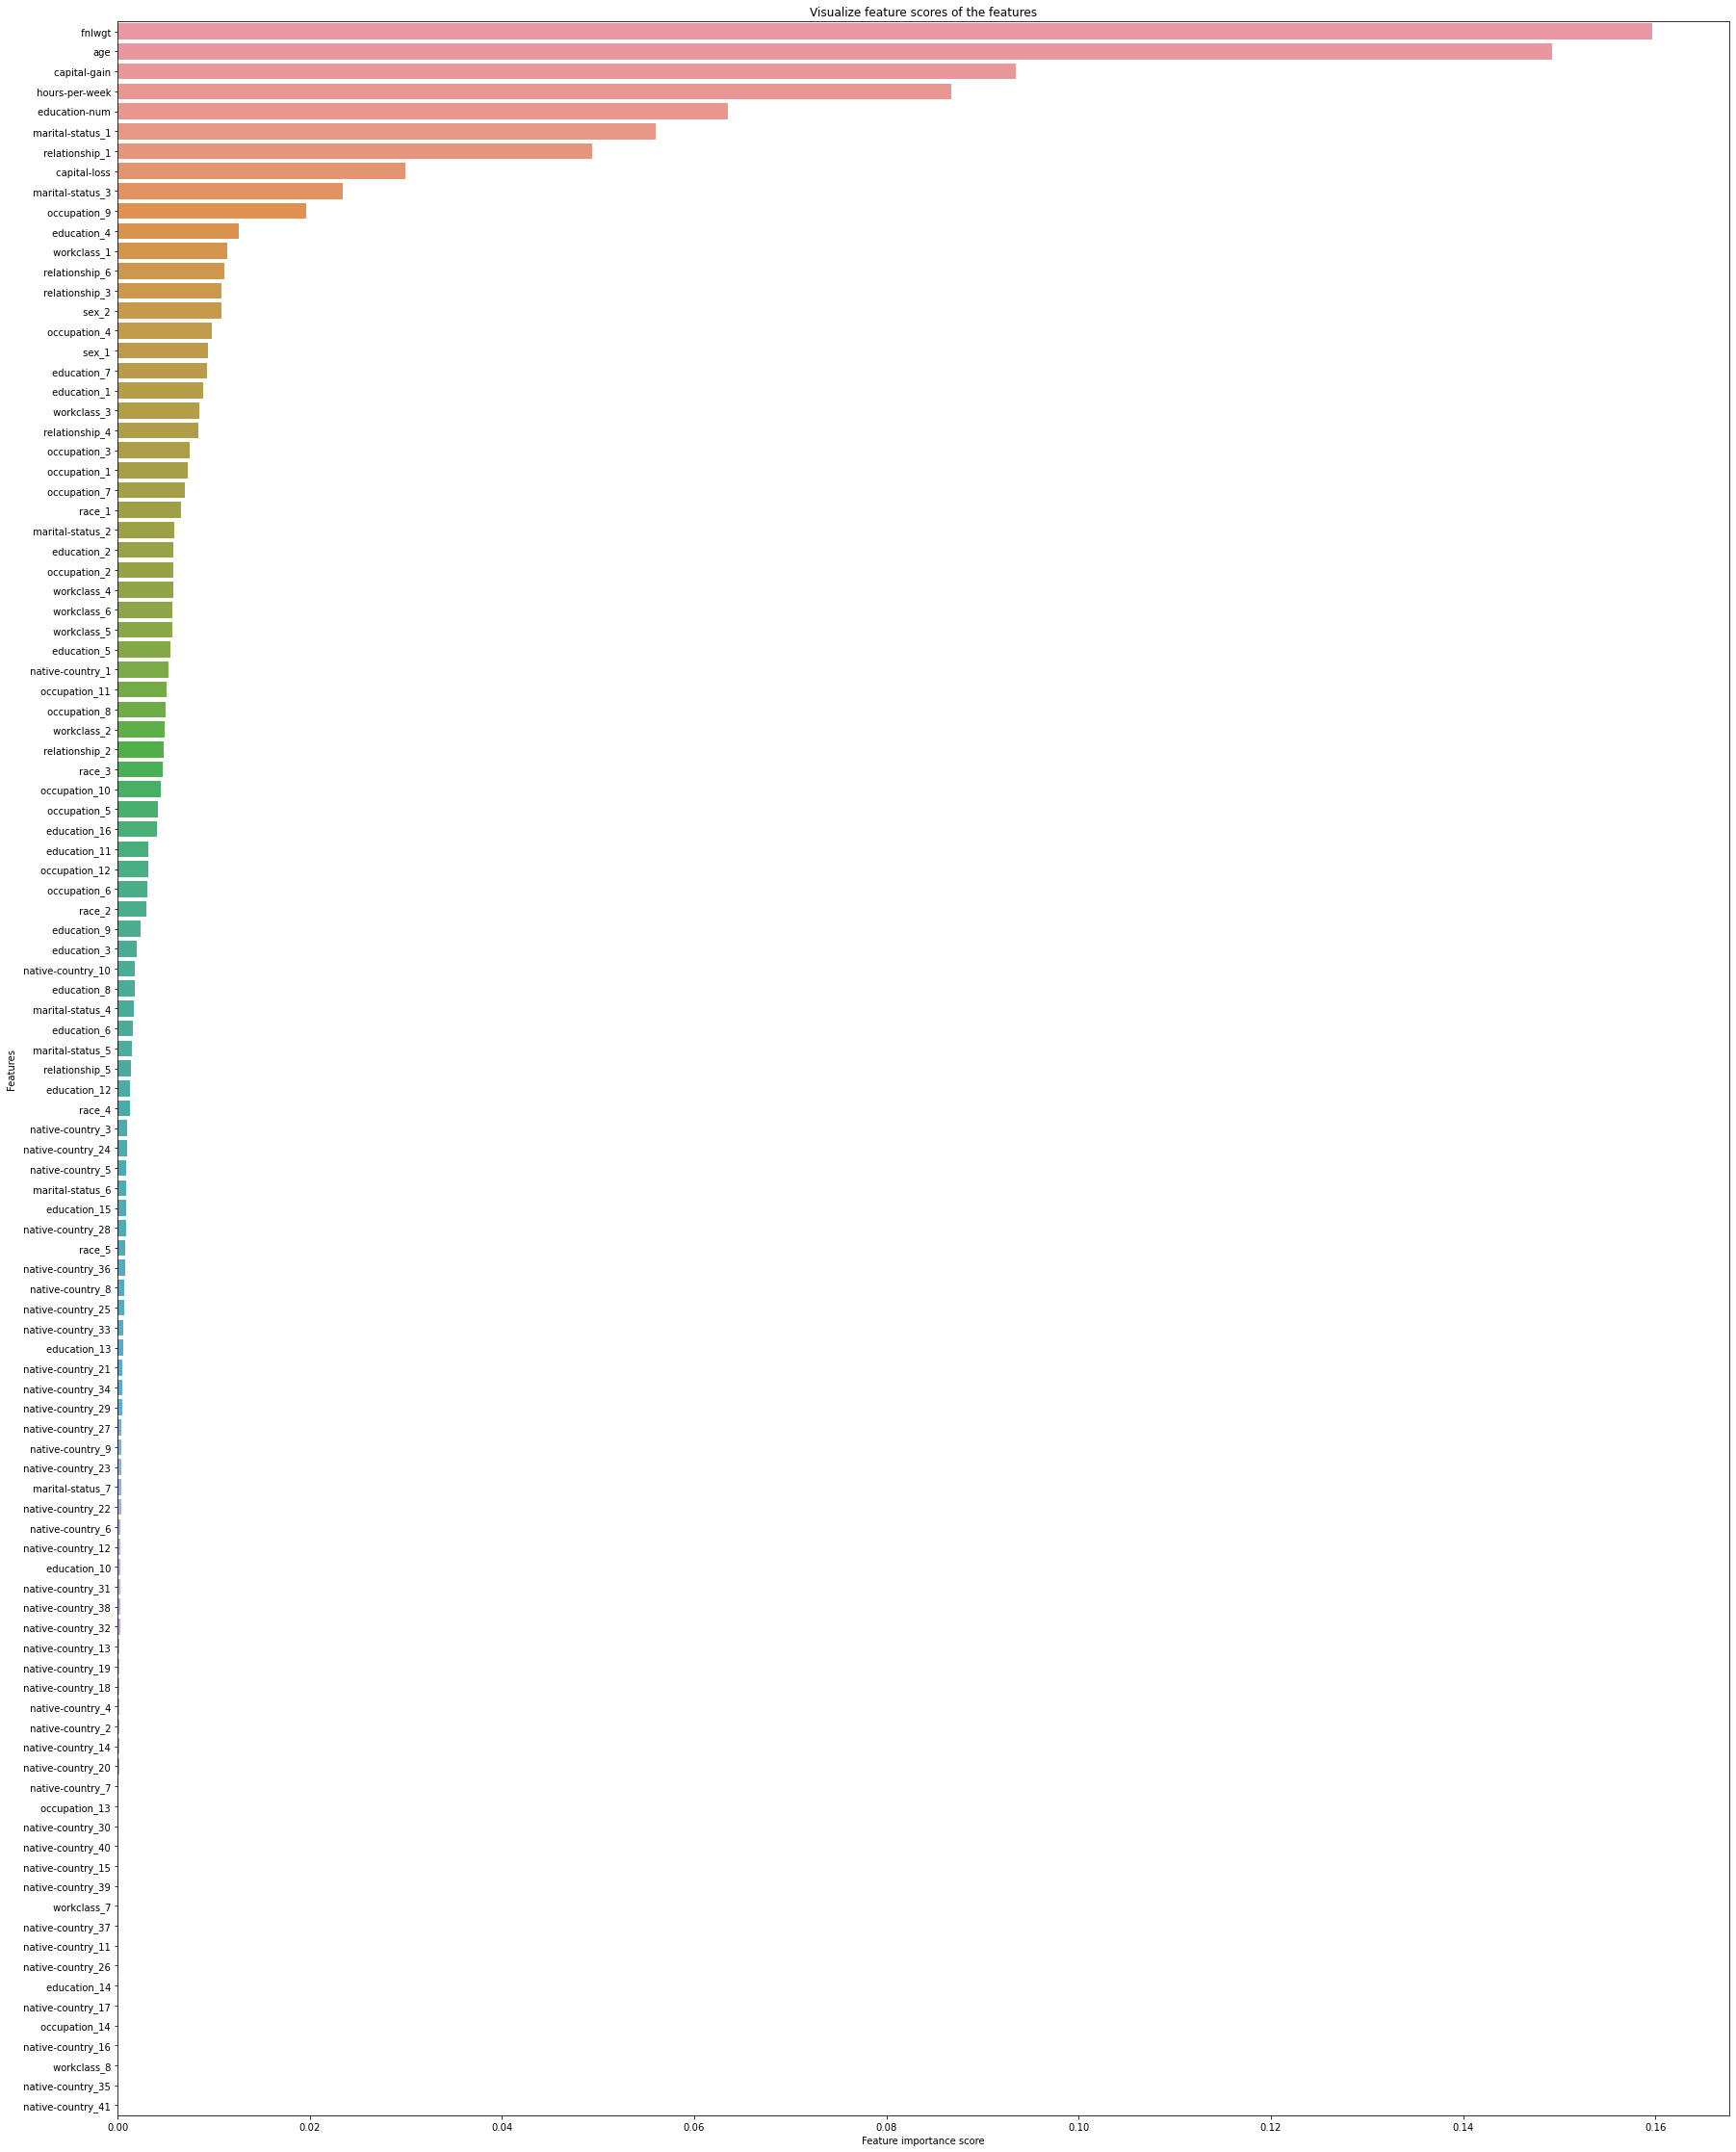

In [105]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 40))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=data)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

__Conclusion:native_country is least imp feature. and fnl_wgt is the most imp feature__